# 履歴書用写真作成用ノートブック

背景除去 -> トリミング -> 背景色設定

In [1]:
%load_ext watermark
%watermark -n -u -v -iv -w -p Pillow,rembg,onnxruntime,matplotlib,japanize-matplotlib

Last updated: Wed, 24 Dec 2025

Python implementation: CPython
Python version       : 3.9.24
IPython version      : 8.18.1

Pillow             : 11.3.0
rembg              : 2.0.61
onnxruntime        : 1.19.2
matplotlib         : 3.9.4
japanize-matplotlib: 1.1.3

Watermark: 2.6.0



In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import japanize_matplotlib
from rembg import remove

元画像サイズ: (1536, 1024)


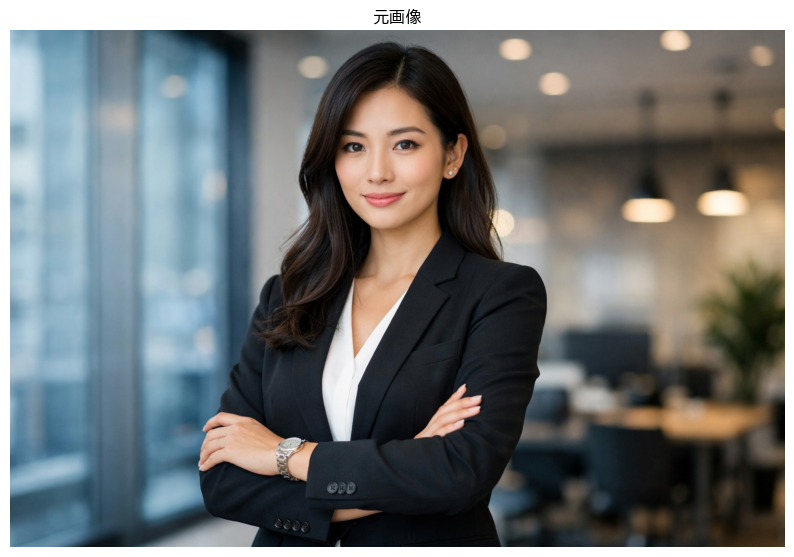

In [3]:
# 1. 元画像読み込み
img_original = Image.open('sample.jpg')
print(f'元画像サイズ: {img_original.size}')
plt.figure(figsize=(10, 7))
plt.imshow(img_original)
plt.title('元画像')
plt.axis('off')
plt.show()

背景除去中...
完了!


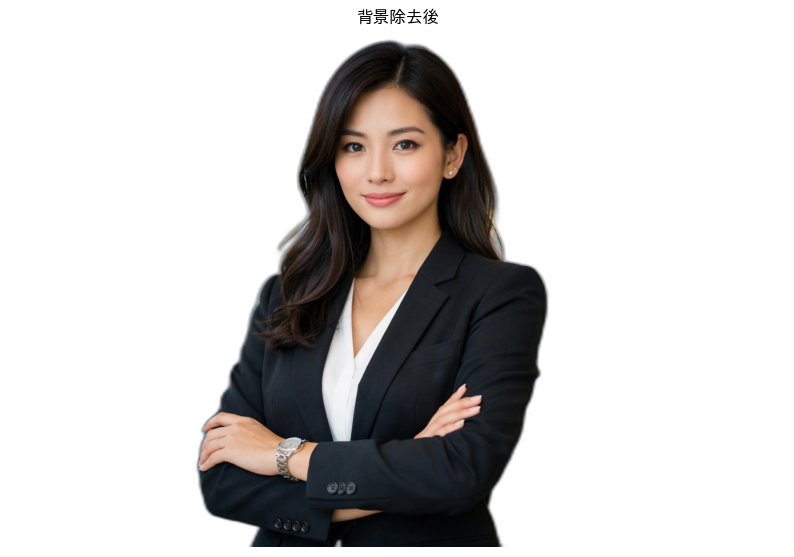

In [4]:
# 2. 背景除去
print('背景除去中...')
img_nobg = remove(img_original)
print('完了!')

plt.figure(figsize=(10, 7))
plt.imshow(img_nobg)
plt.title('背景除去後')
plt.axis('off')
plt.show()

In [5]:
# 3. トリミング設定
output_width = 600
output_height = 800  # 縦横比 4:3

# 切り出し領域
#crop_width = 720
crop_width = 540
#crop_height = 960
crop_height = 720

# 切り出し開始位置の調整（顔を中央に配置）
# crop_x = (img_original.size[0] - crop_width) / 2
crop_x = 470
crop_y = 0

print(f'切り出し領域: ({crop_x}, {crop_y}) から {crop_width}x{crop_height}')

切り出し領域: (470, 0) から 540x720


## 調整のヒント
- `crop_x` を大きくすると右に、小さくすると左にずれる
- `crop_width` を小さくすると顔が大きく写る
- 縦横比は 4:3 を維持（例: crop 720x960 → output 600x800）

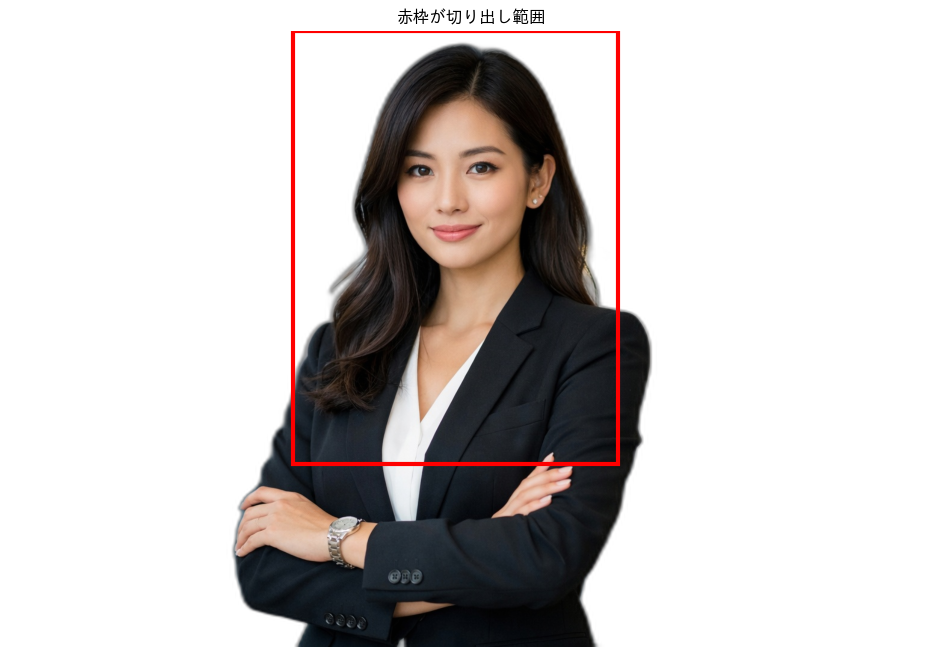

In [6]:
# 4. プレビュー（切り出し範囲を赤枠で表示）
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img_nobg)
rect = patches.Rectangle(
    (crop_x, crop_y), crop_width, crop_height,
    linewidth=3, edgecolor='red', facecolor='none'
)
ax.add_patch(rect)
ax.set_title('赤枠が切り出し範囲')
ax.axis('off')
plt.show()

出力サイズ: (600, 800)


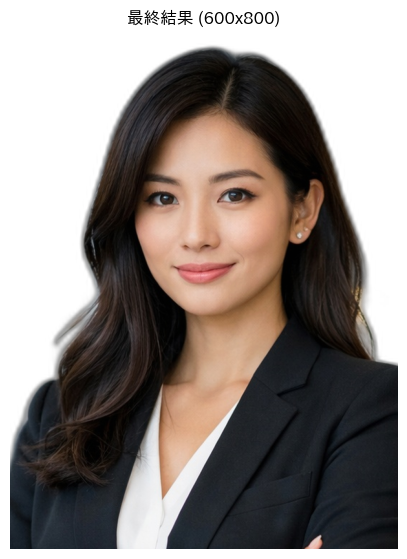

In [7]:
# 5. トリミング & リサイズ
cropped = img_nobg.crop((crop_x, crop_y, crop_x + crop_width, crop_y + crop_height))
resized = cropped.resize((output_width, output_height), Image.Resampling.LANCZOS)

print(f'出力サイズ: {resized.size}')
plt.figure(figsize=(5, 7))
plt.imshow(resized)
plt.title(f'最終結果 ({output_width}x{output_height})')
plt.axis('off')
plt.show()

In [8]:
# 6. 保存
output_filename = 'sample_600x800.png'
resized.save(output_filename)
print(f'保存しました: {output_filename}')

# 背景除去済み画像も保存したい場合
img_nobg.save('sample_rembg.png')

保存しました: sample_600x800.png


## 背景色の設定

履歴書用写真の背景色を選択して適用します。

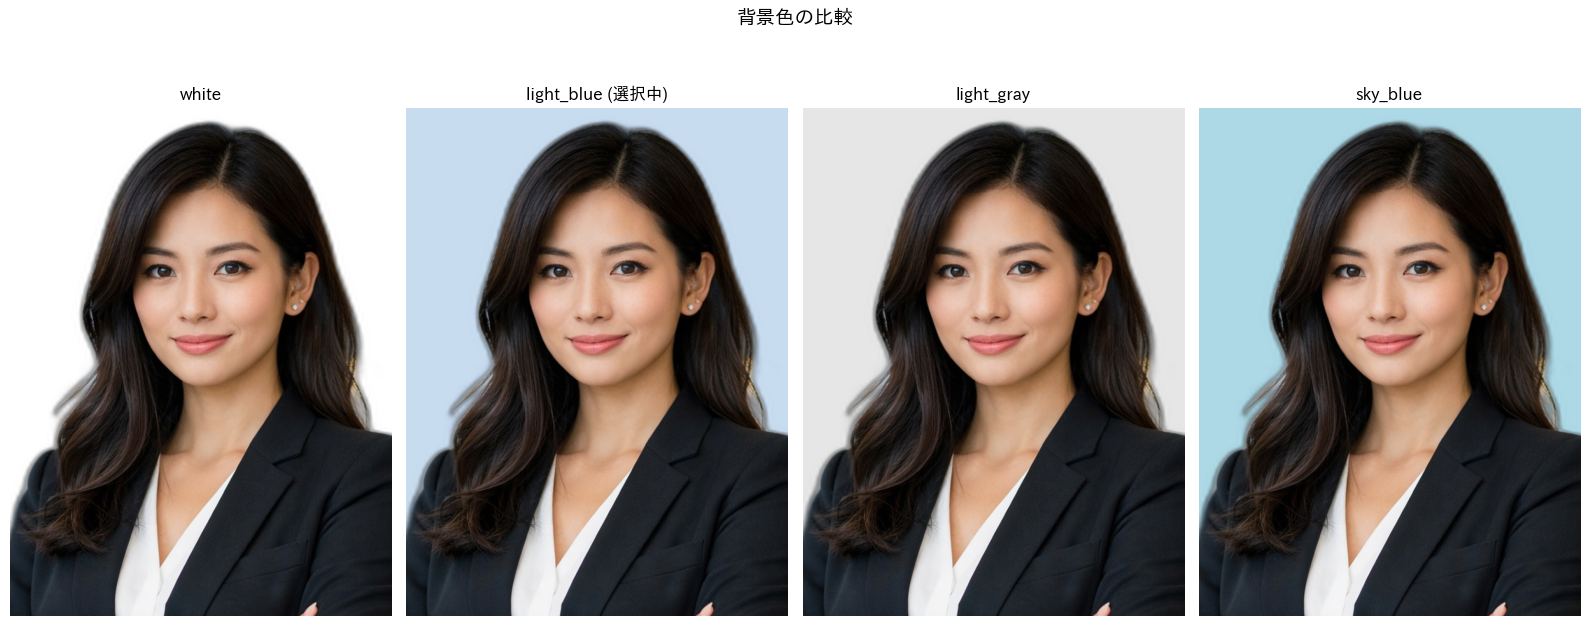

In [9]:
# 7. 背景色を設定
# 履歴書用の背景色オプション
background_colors = {
    'white': (255, 255, 255),           # 白（最も一般的）
    'light_blue': (200, 220, 240),      # 薄い青（証明写真でよく使われる）
    'light_gray': (230, 230, 230),      # 薄いグレー
    'sky_blue': (173, 216, 230),        # スカイブルー
}

# 使用する背景色を選択
selected_bg = 'light_blue'  # 'white', 'light_blue', 'light_gray', 'sky_blue' から選択

# 背景色を適用
bg_color = background_colors[selected_bg]
background = Image.new('RGBA', resized.size, bg_color + (255,))
final_image = Image.alpha_composite(background, resized.convert('RGBA'))
final_image = final_image.convert('RGB')

# プレビュー表示（全色比較）
fig, axes = plt.subplots(1, len(background_colors), figsize=(16, 7))
for ax, (name, color) in zip(axes, background_colors.items()):
    bg = Image.new('RGBA', resized.size, color + (255,))
    preview = Image.alpha_composite(bg, resized.convert('RGBA')).convert('RGB')
    ax.imshow(preview)
    ax.set_title(f'{name}', fontsize=12)
    ax.axis('off')
    if name == selected_bg:
        ax.set_title(f'{name} (選択中)', fontsize=12, fontweight='bold')
plt.suptitle('背景色の比較', fontsize=14)
plt.tight_layout()
plt.show()

保存しました: sample_600x800_light_blue.png


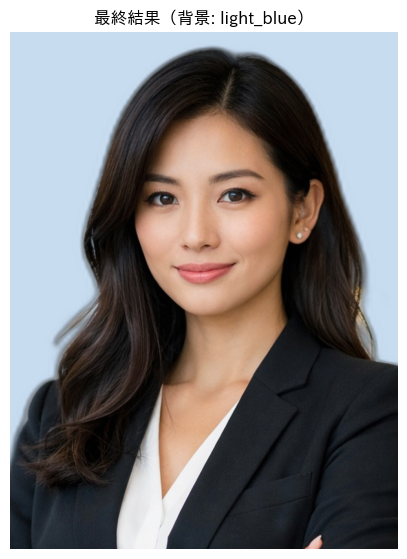

In [10]:
# 8. 背景色付き画像を保存
output_with_bg = f'sample_600x800_{selected_bg}.png'
final_image.save(output_with_bg, 'PNG')
print(f'保存しました: {output_with_bg}')

# 最終結果を表示
plt.figure(figsize=(5, 7))
plt.imshow(final_image)
plt.title(f'最終結果（背景: {selected_bg}）')
plt.axis('off')
plt.show()